###  下面这个是单词的前馈神经网络

train_cost is: 1.07078e-06
train_cost is: 1.07194e-06
train_cost is: 1.06673e-06
train_cost is: 1.06216e-06
train_cost is: 1.05844e-06
train_cost is: 1.05539e-06
train_cost is: 1.05286e-06
train_cost is: 1.05074e-06
train_cost is: 1.04894e-06
train_cost is: 1.0474e-06
train_cost is: 1.04608e-06
train_cost is: 1.04493e-06
train_cost is: 1.04392e-06
train_cost is: 1.04304e-06


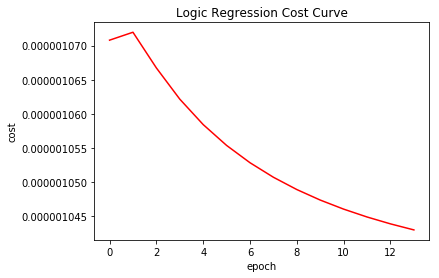

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
inputTensor=pd.read_csv("F:\\Machine+Deep Learning\\tensorInput.csv",sep=",",encoding="gbk")
#创建占位符
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)
#创建变量
#tf.random_normal([1])返回一个符合正太分布的随机数
w=tf.Variable(tf.random_normal([1,23],name='weight'))
b=tf.Variable(tf.random_normal([1,1],name='bias'))
y_predict=tf.sigmoid(tf.add(tf.multiply(X,w),b))
num_samples=len(inputTensor)
cost=tf.reduce_sum(tf.pow(y_predict-Y,2.0))/num_samples
#学习率
lr=0.01
optimizer=tf.train.AdamOptimizer().minimize(cost)
#创建session 并初始化所有变量
num_epoch=50
cost_accum=[]
cost_prev=0
#np.linspace（）创建agiel等差数组，元素个素为num_samples 产生数据源用来训练用
xs=inputTensor.drop(["y"],axis=1).as_matrix(columns=None)
ys=inputTensor["y"].as_matrix(columns=None)
with tf.Session() as sess:
    #初始化所有变量
    sess.run(tf.initialize_all_variables())
    #开始训练
    for epoch in range(num_epoch):
        for x,y in zip(xs,ys):
            sess.run(optimizer,feed_dict={X:x,Y:y})
        train_cost=sess.run(cost,feed_dict={X:x,Y:y})
        cost_accum.append(train_cost)
        print ("train_cost is:",str(train_cost))
        #当误差小于10-8时 终止训练
        if np.abs(cost_prev-train_cost)<1e-9:  
            break
        #保存最终的误差
        cost_prev=train_cost
#画图  画出每一轮训练所有样本之后的误差
plt.plot(range(len(cost_accum)),cost_accum,'r')
plt.title('Logic Regression Cost Curve')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

### 第二个例子  

In [6]:
import tensorflow as tf
##import input_data
from tensorflow.examples.tutorials.mnist import  input_data

##下载导入mnist数据集 如果出现连接问题 请连vpn
mnist = input_data.read_data_sets('data/', one_hot=True)

##part1  初始化参数
x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float', [None, 10])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

##part2 定义函数
actv = tf.nn.softmax(tf.matmul(x, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(actv), reduction_indices=1))
learning_rate = 0.01
optm = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

pred = tf.equal(tf.arg_max(actv, 1), tf.arg_max(y, 1))
accr=tf.reduce_mean(tf.cast(pred,'float'))

##part3 迭代运算
training_epochs=50
batch_size=100
display_step=5

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

for  epoch in range(1,(training_epochs+1)): ##[1~50]
    avg_cost=0
    num_batch=int(mnist.train.num_examples/batch_size)
    for i  in range(num_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        feeds = {x: batch_xs, y: batch_ys}
        sess.run(optm,feed_dict=feeds)
        avg_cost+=sess.run(cost,feed_dict=feeds)/num_batch
    if epoch%display_step==0:
        ##feeds_train={x:batch_xs,y:batch_ys}
        feeds_test = {x: mnist.test.images, y: mnist.test.labels}
        train_acc=sess.run(accr,feed_dict=feeds)
        test_acc=sess.run(accr,feed_dict=feeds_test)
        print("Epoch:%03d/%03d cost:%.9f train_acc:%.3f test_acc:%.3f"%(epoch,training_epochs,avg_cost,train_acc,test_acc))


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `argmax` instead
Epoch:005/050 cost:0.463751020 train_acc:0.950 test_acc:0.891
Epoch:010/050 cost:0.390945452 train_acc:0.920 test_acc:0.903
Epoch:015/050 cost:0.361407535 train_acc:0.950 test_acc:0.908
Epoch:020/050 cost:0.344111125 train_acc:0.940 test_acc:0.911
Epoch:025/050 cost:0.332395335 train_acc:0.810 test_acc:0.914
Epoch:030/050 cost:0.323807536 train_acc:0.850 test_acc:0.915
Epoch:035/050 cost:0.317134497 train_acc:0.910 test_acc:0.916
Epoch:040/050 cost:0.311702925 train_acc:0.880 test_acc:0.918
Epoch:045/050 cost:0.30718559

### 第三个例子

### tensorflow二分类问题

In [42]:
inputTensor
train_X = (inputTensor.drop(["y"],axis=1).as_matrix(columns=None))
train_y = (inputTensor["y"].as_matrix(columns=None))
train_y
#此时这边打的数据以及被转置了！！！！！！！！！！！！

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
####定义一个关于Y的hot编码
def to_categorical(y, num_classes=None):
    y = np.array(y, dtype='int').ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]  
    categorical = np.zeros((n, num_classes))  
    categorical[np.arange(n), y] = 1  
    return categorical  

In [20]:
to_categorical(train_y, num_classes=None)

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [30]:
def next_batch(num, data):  
    idx = np.arange(0, len(data))  # get all possible indexes  
    np.random.shuffle(idx)  # shuffle indexes  
    idx = idx[0:num]  # use only `num` random indexes  
    print(idx)  
    data_shuffle = [data[i] for i in idx]  # get list of `num` random samples  
    data_shuffle = np.asarray(data_shuffle)  # get back numpy array  
    return data_shuffle 

In [46]:
next_batch(10,train_X)

[124519  52972  81556 130682 153672  95817  22676  20717 132009  43395]


array([[  5.00000000e-01,   5.17241380e-02,   3.33333333e-01,
          0.00000000e+00,   1.99430200e-02,   1.90037430e-02,
          1.43472000e-03,   9.42900000e-01,   4.16666700e-03,
          6.59945000e-03,   1.93452381e-01,   9.18043700e-02,
          6.21325200e-02,   2.12868325e-01,   1.01651187e-01,
          3.49860630e-02,   4.08868030e-02,   9.88448300e-03,
          2.24325840e-02,   6.08695652e-01,   1.49483100e-03,
          8.38709677e-01,   8.33333333e-01],
       [  3.33333333e-01,   2.15517240e-02,   1.66666667e-01,
          1.66666667e-01,   2.88461540e-02,   2.80017280e-02,
          1.43472000e-03,   9.60500000e-01,   0.00000000e+00,
          0.00000000e+00,   1.45833333e-01,   5.03710400e-03,
          4.07012400e-03,   1.88072890e-02,   4.82456140e-02,
          2.01861240e-02,   2.07917500e-02,   2.80907800e-03,
          6.86234000e-04,   4.78260870e-01,   7.69339100e-03,
          7.09677419e-01,   6.94444444e-01],
       [  2.50000000e-01,   5.17241380e-02

In [47]:
# 建立模型初始化
x = tf.placeholder("float", shape=[None, 2])
y_ = tf.placeholder("float", shape=[None, 2])
W = tf.Variable(tf.zeros([2, 2]))
b = tf.Variable(tf.zeros([2]))

import tensorflow as tf
sess = tf.InteractiveSession()  
sess.run(tf.global_variables_initializer()) 